In [236]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [279]:
airbnb = pd.read_csv('airbnb.csv')
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [280]:
# print(airbnb.shape)
# for col in airbnb.columns:
#     print("'" + col + "'"  +",")

In [281]:
import re
def clean(row):
    text = re.sub('[\t]{2,}', '', row) #去除兩個以上空格或tab
    text = re.sub('(http|https)://.*', '', text) #去除網址(.:任意字元，*:0次以上)
    text = re.sub('&.*;', '', text) #去除html特殊字元編碼
    text = re.sub('<\w\+\w{4,}>', '', text) #去除阿拉伯字母
    text = re.sub('#_*', '', text) #去除一個或多個_
    text = re.sub('\\n', ' ', text) #去除換行
    text = re.sub('\s{2,}', ' ', text) #去除多個空格(+:一次以上)
    text = re.sub('^\\s+|\\s+$', '', text) #去除開頭/結尾有一個或多個空格
    # text = re.sub('[^a-zA-Z0-9 ]', '', text) #除了字母,數字空白?!.的都去掉(表情符號去掉)
    text = re.sub('{', '', text)
    text = re.sub('}', '', text)
    text = re.sub('"', '', text)
    return text

def gen_facility_col(df, facility_list, temp_value):
  for i in range(len(facility_list)):
    df.insert(30+i, column = facility_list[i], value = list(temp_value)) # 從第30行依照require_facility順序新增該設施欄位 temp_value作為0~74110的row初始值
    for j in range(len(df)):
      amenities_templist = df.at[j, "amenities_list"] # amenities_templist代表第j個Airbnb的總設施list
      element = facility_list[i] # 創一個element變數紀錄當前要比對之設施為何
      if element in amenities_templist: # 若該設施(element)存在於某airbnb之總設施list中 則該row值填1 反之填0
        df.at[j, element] = 1
      else:
        df.at[j, element] = 0
  return df

airbnb["amenities_list"] = airbnb.amenities.apply(clean)
airbnb["amenities_list"] = airbnb["amenities_list"].str.split(",", expand=False)
require_facility = ["Wireless Internet", "Kitchen", "Heating", "Essentials", "Smoke detector"]
temp_value = np.arange(0,74111)
airbnb = gen_facility_col(airbnb, facility_list=require_facility, temp_value=temp_value)
airbnb

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,thumbnail_url,zipcode,bedrooms,beds,amenities_list,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,...",1,1,1,1,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,...",1,1,1,1,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio...",1,1,1,1,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",1,1,1,1,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,NaN,20009,0.0,1.0,"[TV, Internet, Wireless Internet, Air conditio...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0,[],0,0,0,0,0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",1,1,1,1,1
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0,"[TV, Internet, Wireless Internet, Air conditio...",1,1,1,1,1
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,"[TV, Wireless Internet, Air conditioning, Kitc...",1,1,1,1,1


In [282]:
## Drop invalid features and NA value
airbnb = airbnb.drop(columns = ['id','amenities','description','first_review','host_since',
                                'last_review','latitude','longitude','name','neighbourhood',
                                'thumbnail_url','zipcode','amenities_list'])
airbnb = airbnb.dropna(axis=0, how='any')
#airbnb.to_csv('air.csv', sep=',', index=False)


In [283]:
## Encoding
airbnb = airbnb[(airbnb["property_type"] == 'Apartment') | (airbnb["property_type"] == 'House')]
airbnb['host_response_rate'] = airbnb['host_response_rate'].str.replace('%','')
encoder = LabelEncoder()
airbnb['property_type'] = encoder.fit_transform(airbnb['property_type'])
airbnb['room_type'] = encoder.fit_transform(airbnb['room_type'])
airbnb['bed_type'] = encoder.fit_transform(airbnb['bed_type'])
airbnb['cancellation_policy'] = encoder.fit_transform(airbnb['cancellation_policy'])
airbnb['cleaning_fee'] = encoder.fit_transform(airbnb['cleaning_fee'])
airbnb['city'] = encoder.fit_transform(airbnb['city'])
airbnb['instant_bookable'] = encoder.fit_transform(airbnb['instant_bookable'])
airbnb['host_identity_verified'] = encoder.fit_transform(airbnb['host_identity_verified'])
airbnb['host_has_profile_pic'] = encoder.fit_transform(airbnb['host_has_profile_pic'])
airbnb.rename(columns={'Wireless Internet':'Wireless_Internet'}, inplace=True)
airbnb.rename(columns={'Smoke detector':'Smoke_detector'}, inplace=True)

airbnb.head()
#print(airbnb['city'].value_counts())
#airbnb.to_csv('air1.csv', sep=',', index=False)

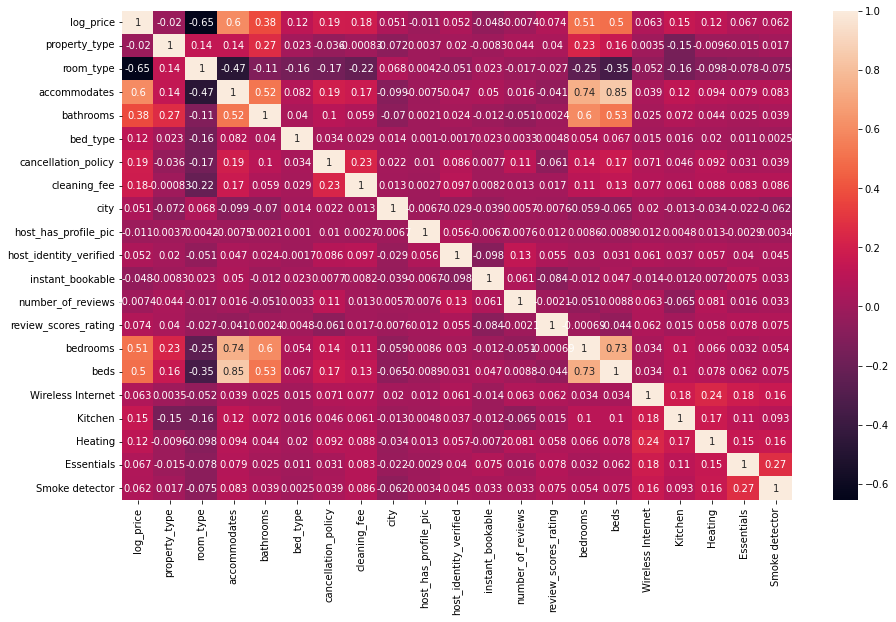

In [267]:
# Multivariate analysis using Pearson correlation
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))
sns.heatmap(airbnb.corr(), annot=True)
plt.show
airbnb.to_csv('air1.csv', sep=',', index=False)

In [286]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

cols = ['property_type', 'room_type', 'accommodates','bathrooms','bed_type',
       'cancellation_policy','cleaning_fee','city','host_has_profile_pic','host_identity_verified',
       'host_response_rate','instant_bookable','number_of_reviews','review_scores_rating','bedrooms','beds'
        ,'Wireless_Internet','Kitchen','Heating','Essentials','Smoke_detector']

X = airbnb.drop(['log_price'], axis=1)
y = airbnb['log_price']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = preprocessing.scale(X_train)
X_train = pd.DataFrame(X_train, columns = cols)
X_train = pd.DataFrame(X_train.astype(np.float32))

X_test = preprocessing.scale(X_test)
X_test = pd.DataFrame(X_test, columns = cols)
X_test = pd.DataFrame(X_test.astype(np.float32))

In [287]:
## Features Selection
import statsmodels.formula.api as smf

def processSubset(X_label, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    X_smf = ' + '.join(X_label)
    f     = 'log_price ~ {}'.format(X_smf)
    # Fit model
    lin_reg = smf.ols(formula=f, data=pd.concat([X_train, y_train], axis=1)).fit()
    RSS = ((lin_reg.predict(X_test[list(X_label)]) - y_test) ** 2).sum()
    return {'model': lin_reg, 'RSS': RSS}

def forward(predictors, X_train, y_train, X_test, y_test):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))

    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()] # Choose the model with the highest RSS

    return best_model  # Return the best model, along with some other useful information about the model

In [288]:
## Fit Forward selection
models_test = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):
    models_test.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
    exog = models_test.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(i, predictors)

1 ['Kitchen']
2 ['Kitchen', 'Wireless_Internet']
3 ['Kitchen', 'Wireless_Internet', 'bed_type']
4 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate']
5 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector']
6 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector', 'bedrooms']
7 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector', 'bedrooms', 'Essentials']
8 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector', 'bedrooms', 'Essentials', 'review_scores_rating']
9 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector', 'bedrooms', 'Essentials', 'review_scores_rating', 'number_of_reviews']
10 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector', 'bedrooms', 'Essentials', 'review_scores_rating', 'number_of_reviews', 'cleaning_fee']
11 ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rat

10


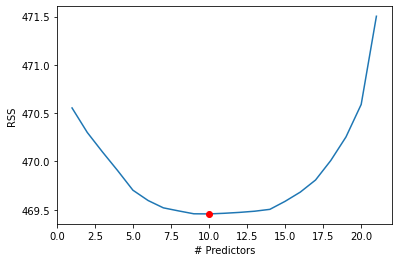

In [290]:
## plot the selection progress
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=range(1,22), y=models_test['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_test['RSS'].argmin()+1, models_test['RSS'].min(), 'or')
print(models_test['RSS'].argmin()+1)

In [297]:
## Define function to compute MAE and RMSE value both of training and testing set with different model
from sklearn.metrics import mean_absolute_error, mean_squared_error

def regression_cu(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred_ts = model.predict(X_test)
    pred_tr = model.predict(X_train)

    y_train = pd.Series(y_train.astype(np.int32))
    y_test = pd.Series(y_test.astype(np.int32))

    pred_ts = pd.Series(pred_ts.astype(np.int32))
    pred_tr = pd.Series(pred_tr.astype(np.int32))

    train_mae = mean_absolute_error(y_train, pred_tr)
    train_rmse = mean_squared_error(y_train, pred_tr, squared=False)
    print ("Training set MAE: {:.5}".format(train_mae))
    print ("Training set RMSE: {:.5}".format(train_rmse))

    test_mae = mean_absolute_error(y_test, pred_ts)
    test_rmse = mean_squared_error(y_test, pred_ts, squared=False)
    print ("Testing set MAE : {:.5}".format(test_mae))
    print ("Testing set RMSE: {:.5}".format(test_rmse))

    #pd.DataFrame(pred_ts, columns=['log_price']).to_csv('prediction.csv')
    #X_test.to_csv('X_test.csv', sep=',', index=False)

In [292]:
## linear Regression model
from sklearn.linear_model import LinearRegression as lr

predictor_var = ['Kitchen', 'Wireless_Internet', 'bed_type', 'host_response_rate', 'Smoke_detector',
                 'bedrooms', 'Essentials', 'review_scores_rating', 'number_of_reviews', 'cleaning_fee']

lr_model = lr(fit_intercept = True)
regression_cu(lr_model, X_train[predictor_var], X_test[predictor_var], y_train, y_test)

Training set MAE: 0.38471
Training set RMSE: 0.63751
Testing set MAE : 0.38402
Testing set RMSE: 0.64076


In [293]:
## DecisionTree model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)
regression_cu(dt_model, X_train[predictor_var], X_test[predictor_var], y_train, y_test)

Training set MAE: 0.21462
Training set RMSE: 0.47032
Testing set MAE : 0.48008
Testing set RMSE: 0.74785


In [294]:
## RandomForest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor( n_estimators=100, random_state=0)
regression_cu(rf_model, X_train[predictor_var], X_test[predictor_var], y_train, y_test)


Training set MAE: 0.11829
Training set RMSE: 0.3441
Testing set MAE : 0.31918
Testing set RMSE: 0.57357


In [299]:
## Linear Regression using quadratic polynomial
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly.fit(X_train[predictor_var])
X_train_quad = poly.transform(X_train[predictor_var])
X_test_quad = poly.transform(X_test[predictor_var])
lrq_model = lr()
regression_cu(lrq_model, X_train_quad, X_test_quad , y_train, y_test)


Training set MAE: 0.39015
Training set RMSE: 0.64274
Testing set MAE : 3.2748
Testing set RMSE: 5.4279


In [300]:
## K-ford cross validation
from sklearn.model_selection import KFold
from tqdm import tqdm
tr_kf_mae = []
ts_kf_mae = []
tr_kf_rmse = []
ts_kf_rmse = []

lm = lr()
tmp = X[predictor_var]
kf = KFold(n_splits=5 , shuffle=True, random_state=0)
for i in tqdm(range(1,6)):
    for train_index, test_index in kf.split(tmp):
        X_train, X_test = tmp.iloc[train_index], tmp.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        poly = PolynomialFeatures(i,include_bias=False)
        poly.fit(X_train)
        X_train_2 = poly.transform(X_train)
        X_test_2 = poly.transform(X_test)

        lm_fit = lm.fit(X_train_2, y_train)
        lm_pred_tr = lm_fit.predict(X_train_2)
        lm_pred_ts = lm_fit.predict(X_test_2)

        tr_kf_mae.append(mean_absolute_error(y_train, lm_pred_tr))
        ts_kf_mae.append(mean_absolute_error(y_test, lm_pred_ts))

        tr_kf_rmse.append(mean_squared_error(y_train, lm_pred_tr, squared=False))
        ts_kf_rmse.append(mean_squared_error(y_test, lm_pred_ts, squared=False))


print ("Training set MAE: {:.5}".format(np.array(tr_kf_mae).mean()))
print ("Training set RMSE: {:.5}".format(np.array(tr_kf_rmse).mean()))
print ("Testing set MAE : {:.5}".format(np.array(ts_kf_mae).mean()))
print ("Testing set RMSE: {:.5}".format(np.array(ts_kf_rmse).mean()))

100%|██████████| 5/5 [03:50<00:00, 46.05s/it]

Training set MAE: 0.4215
Training set RMSE: 0.53458
Testing set MAE : 0.60753
Testing set RMSE: 6.7698


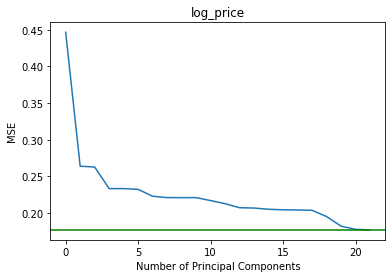

In [301]:
## PCA
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.decomposition import PCA, TruncatedSVD
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(preprocessing.scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = lr()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,np.ones((len(X_reduced),1)), y,
                                           cv=cv,scoring='neg_mean_squared_error').mean()
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, X_reduced.shape[1]+1):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y, cv=cv,
                                               scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Plot cross-validation results
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('log_price')
plt.axhline(y=score, color='g', linestyle='-');


In [302]:
## PCR
X_red_tr = pca.fit_transform(X_train)
X_red_ts = pca.transform(X_test)

best_pca_num = 21
pcr = lr()
pcr.fit(X_red_tr[:,:best_pca_num], y_train)

pred_pcr_tr = pcr.predict(X_red_tr)
pred_pcr_ts = pcr.predict(X_red_ts)

print ("Training set MAE: {:.5}".format(mean_absolute_error(y_train, pred_pcr_tr)))
print ("Training set RMSE: {:.5}".format(mean_squared_error(y_train, pred_pcr_tr, squared=False)))
print ("Testing set MAE : {:.5}".format(mean_absolute_error(y_test, pred_pcr_ts)))
print ("Testing set RMSE: {:.5}".format(mean_squared_error(y_test, pred_pcr_ts, squared=False)))

Training set MAE: 0.44416
Training set RMSE: 0.55836
Testing set MAE : 0.44935
Testing set RMSE: 0.56168
